# Imports EXPERT

Esta tabla contiene la información de los imports a nivel de fichero (módulo).

## 1 - Obtencion de datos

In [12]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'import__expertise_level'
TARGET_CLASS = 'PROFESSIONAL'
full_table = get_data('imports')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for PROFESSIONAL class.")

2025-01-27 11:35:08.582701 Data cache files found ...
2025-01-27 11:35:08.598325 Data cache files successfully loaded!!
The dataset contains 3915 (49.31%) instances for BEGINNER class and 4024 (50.69%) for PROFESSIONAL class.


In [13]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'imports'
TABLE_FEATURES = ['import__number_imports', 'import__module_imports_pct', 'import__average_imported_modules', 'import__from_imports_pct', 'import__average_from_imported_modules', 'import__average_as_in_imported_modules', 'import__local_imports_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (4024, 7)
As we can see the downloaded data contains a total of 4024 instances. For each instance we have 7 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [14]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4024 entries, 0 to 4023
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   import__number_imports                  4024 non-null   int64  
 1   import__module_imports_pct              4024 non-null   float64
 2   import__average_imported_modules        4024 non-null   float64
 3   import__from_imports_pct                4024 non-null   float64
 4   import__average_from_imported_modules   4024 non-null   float64
 5   import__average_as_in_imported_modules  4024 non-null   float64
 6   import__local_imports_pct               4024 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 251.5 KB
None


Cómo podemos ver la tabla está compuesta por 7 variables numéricas y una de tipo objeto. 

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [15]:
X.isnull().sum()

import__number_imports                    0
import__module_imports_pct                0
import__average_imported_modules          0
import__from_imports_pct                  0
import__average_from_imported_modules     0
import__average_as_in_imported_modules    0
import__local_imports_pct                 0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [16]:
print_empty_cols(X)

import__number_imports
----------------------
0 instancias no tienen un valor para la columna import__number_imports


import__module_imports_pct
--------------------------
0 instancias no tienen un valor para la columna import__module_imports_pct


import__average_imported_modules
--------------------------------
0 instancias no tienen un valor para la columna import__average_imported_modules


import__from_imports_pct
------------------------
0 instancias no tienen un valor para la columna import__from_imports_pct


import__average_from_imported_modules
-------------------------------------
0 instancias no tienen un valor para la columna import__average_from_imported_modules


import__average_as_in_imported_modules
--------------------------------------
0 instancias no tienen un valor para la columna import__average_as_in_imported_modules


import__local_imports_pct
-------------------------
0 instancias no tienen un valor para la columna import__local_imports_pct




### 2.2 - Describimos los valores de las variables de la tabla.

In [17]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,4024.0,5.038022,4.430791,0.0,2.00,4.000000,7.000000,62.0
import__module_imports_pct,4024.0,0.137560,0.204759,0.0,0.00,0.000000,0.250000,1.0
import__average_imported_modules,4024.0,0.434891,0.495804,0.0,0.00,0.000000,1.000000,1.0
import__from_imports_pct,4024.0,0.827400,0.257107,0.0,0.75,1.000000,1.000000,1.0
import__average_from_imported_modules,4024.0,1.496703,0.834490,0.0,1.00,1.285714,1.833333,16.0
import__average_as_in_imported_modules,4024.0,0.007297,0.056229,0.0,0.00,0.000000,0.000000,1.0
import__local_imports_pct,4024.0,0.674886,0.464390,0.0,0.00,1.000000,1.000000,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [18]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "import__number_imports": [(0, 0), (0, 3), (3, 7), (7, inf)],  # min: 0 max: 194 
    "import__module_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 8.5 
    "import__from_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_from_imported_modules": [(0.0, 0.0), (1.0, 1.0), (1.0, inf)],  # min: 0.0 max: 23.0 
    "import__average_as_in_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0 
    "import__local_imports_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0 
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['import__number_imports'], 10))
print(get_statistics(X_copy, ['import__module_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_imported_modules'], 10))
print(get_statistics(X_copy, ['import__from_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_from_imported_modules'], 10))
print(get_statistics(X_copy, ['import__average_as_in_imported_modules'], 10))
print(get_statistics(X_copy, ['import__local_imports_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['import__average_imported_modules', 'import__module_imports_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
import__number_imports  count  percentage
                 [0_3)   1380   34.294235
                 [3_7)   1327   32.977137
               [7_inf]   1176   29.224652
                 [0_0]    141    3.503976

import__module_imports_pct  count  percentage
                 [0.0_0.0]   2274   56.510934
                 [0.0_0.5)   1351   33.573559
                   [0.5_1)    360    8.946322
                     [1_1]     39    0.969185

import__average_imported_modules  count  percentage
                       [0.0_0.0]   2274   56.510934
                       [0.0_inf]   1750   43.489066

import__from_imports_pct  count  percentage
                   [1_1]   2133   53.006958
                 [0.5_1)   1548   38.469185
               [0.0_0.0]    180    4.473161
               [0.0_0.5)    163    4.050696

import__average_from_imported_modules  count  percentage
                            [1.0_inf]   2245   55.790258
                            [1.0_1.0]   159

In [19]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (4024, 7)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

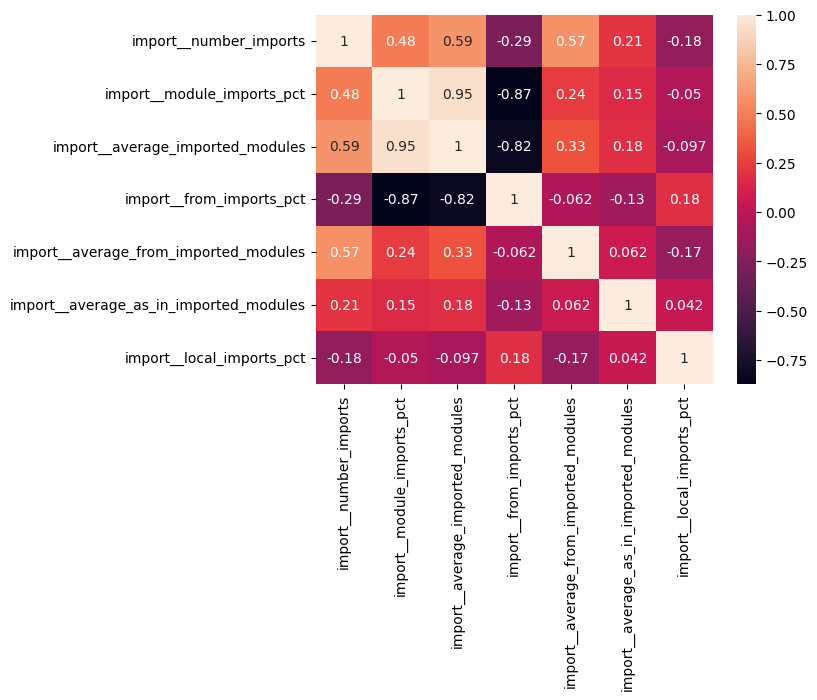

In [20]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 7 variable (3 porcentuales y 4 numericas)

### Variable number_imports (1/7)
Esta variable es de tipo numérica y nos indica el número imports definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 62. Con una media de 5.

<Axes: ylabel='import__number_imports'>

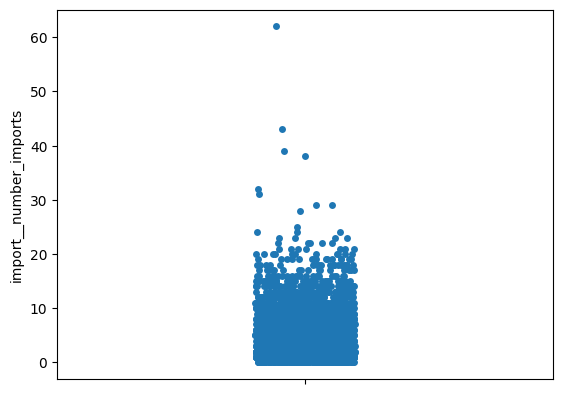

In [21]:
sns.stripplot(X['import__number_imports'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [22]:
print_outliers_for_df_column(X, 'import__number_imports')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8054639506899677
Rango valores atípicos extremos (Tukey): [-13.0,22.0]
Rango valores atípicos leves (Tukey): [-5.5,14.5]
Rango valores atípicos extremos (Fixed BoxPlot): [1.5525635698427633,195.05957920742046]
-3.0IQR: 0 instancias tienen un valor para import__number_imports inferior a -13.0 (Q1-3*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__number_imports inferior a -5.5 (Q1-1.5*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
+1.5IQR: 147 instancias tienen un valor para import__number_imports superior a 14.5 (Q3+1.5*IQR) para import__number_imports. Representando un 3.653% del total de instancias.
+3.0IQR: 17 instancias tienen un valor para import__number_imports superior a 22.0 (Q3-3*IQR) para import__number_imports. Representando un 0.4225% del total de instancias.
L: 808 instancias tienen un valor para im

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 22 (Con un MC de 80 usamos Tuckey Extremo)

In [45]:
X[X['import__number_imports'] > 22].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,30.588236,0.089732,0.647059,0.910268,1.612904,0.012579,0.599454
std,10.222884,0.084669,0.492592,0.084669,0.412840,0.021171,0.487376
min,23.000000,0.000000,0.000000,0.724138,1.041667,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.862069,1.333333,0.000000,0.000000
50%,28.000000,0.086957,1.000000,0.913043,1.454545,0.000000,0.958333
75%,32.000000,0.137931,1.000000,1.000000,1.956522,0.027778,1.000000
max,62.000000,0.275862,1.000000,1.000000,2.363636,0.071429,1.000000


### Variable average_imported_modules (2/7)
Esta variable representa el número medio de alias importados en cada clausula import. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.43.

<Axes: ylabel='import__average_imported_modules'>

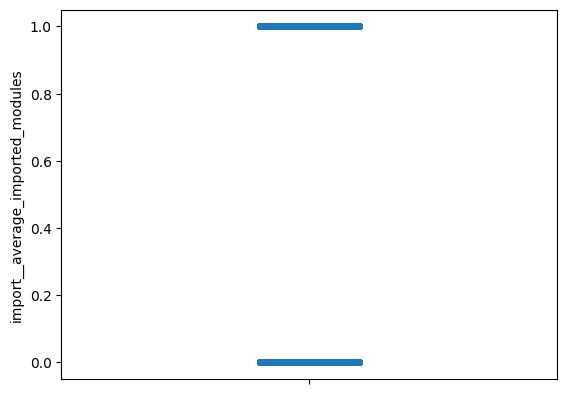

In [24]:
sns.stripplot(X['import__average_imported_modules'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente. 

In [25]:
print_outliers_for_df_column(X, 'import__average_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.06930509209632874
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.1769157974811786,2.9791856584469287]
-3.0IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -3.0 (Q1-3*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -1.5 (Q1-1.5*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__average_imported_modules superior a 2.5 (Q3+1.5*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__average_imported_modules superior a 4.0 (Q3-3*IQR) para import__average_imported_modules. Representando un 0.0

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [46]:
X[(X['import__average_imported_modules'] > 0) & (X['import__average_imported_modules'] < 1)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable average_from_imported_modules (3/7)
Esta variable representa el número medio de imports con la clausula From. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 16. Con una media de 1.49.

<Axes: ylabel='import__average_from_imported_modules'>

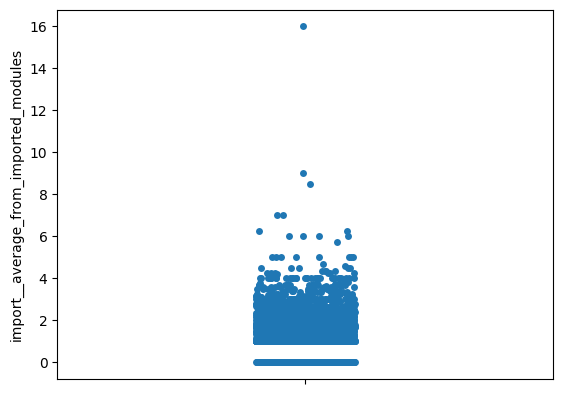

In [27]:
sns.stripplot(X['import__average_from_imported_modules'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [28]:
print_outliers_for_df_column(X, 'import__average_from_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7204076806959154
Rango valores atípicos extremos (Tukey): [-1.5000001192092896,4.333333492279053]
Rango valores atípicos leves (Tukey): [-0.2500000596046448,3.083333432674408]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8995688924378821,24.13751821162192]
-3.0IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -1.5000001192092896 (Q1-3*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -0.2500000596046448 (Q1-1.5*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 161 instancias tienen un valor para import__average_from_imported_modules superior a 3.083333432674408 (Q3+1.5*IQR) para import__average_from_imported_modules. Representando un 4.001% del total de instancias.
+3.0IQR: 27 instancias tiene

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 4.33 (Con un MC de 72 usamos Tukey Extremo)

In [47]:
X[X['import__average_from_imported_modules'] > 4.33].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000
mean,2.935484,0.172870,0.451613,0.827130,5.769354,0.0,0.677419
std,2.205077,0.222369,0.505879,0.222369,2.235228,0.0,0.457318
min,1.000000,0.000000,0.000000,0.250000,4.333333,0.0,0.000000
25%,2.000000,0.000000,0.000000,0.666667,4.500000,0.0,0.000000
50%,2.000000,0.000000,0.000000,1.000000,5.000000,0.0,1.000000
75%,4.000000,0.333333,1.000000,1.000000,6.000000,0.0,1.000000
max,13.000000,0.750000,1.000000,1.000000,16.000000,0.0,1.000000


### Variable average_as_in_imported_modules (4/7)
Esta variable es de tipo numérica y nos indica el número medio de import con la cláusula as. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.007.

<Axes: ylabel='import__average_as_in_imported_modules'>

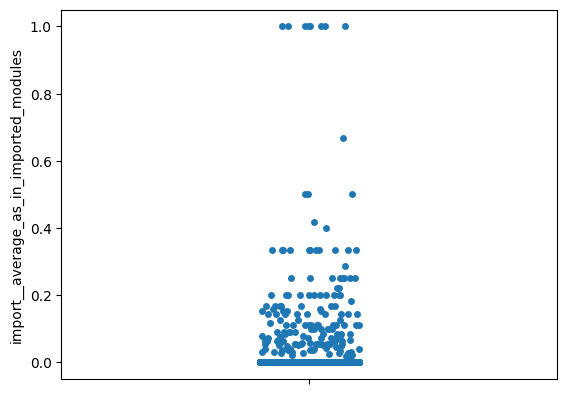

In [30]:
sns.stripplot(X['import__average_as_in_imported_modules'])

In [31]:
print_outliers_for_df_column(X, 'import__average_as_in_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9314698216248283
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-3*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-1.5*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 161 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3+1.5*IQR) para import__average_as_in_imported_modules. Representando un 4.001% del total de instancias.
+3.0IQR: 161 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3-3*IQR) para import__average_as_in_imported_modules. Re

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Con un MC de 93 usamos U)

In [32]:
X[X['import__average_as_in_imported_modules'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,10.260870,0.231051,0.875776,0.768949,1.633698,0.182367,0.777079
std,6.723579,0.165580,0.330866,0.165580,0.619908,0.217648,0.409497
min,1.000000,0.000000,0.000000,0.333333,1.000000,0.007692,0.000000
25%,7.000000,0.105263,1.000000,0.666667,1.125000,0.058824,1.000000
50%,9.000000,0.200000,1.000000,0.800000,1.470588,0.111111,1.000000
75%,13.000000,0.333333,1.000000,0.894737,2.000000,0.200000,1.000000
max,62.000000,0.666667,1.000000,1.000000,4.000000,1.000000,1.000000


### Variable module_imports_pct (5/7)
Esta variable representa la proporción de import simples del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.137.

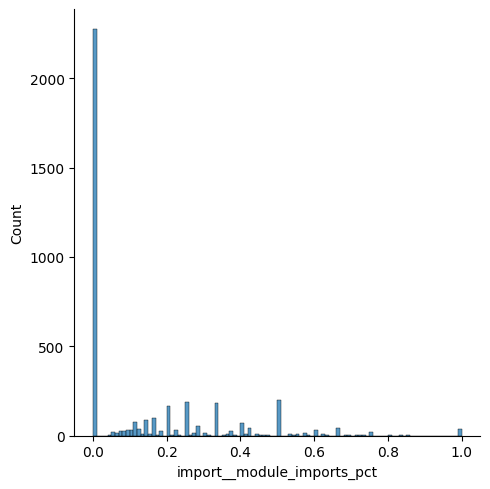

In [33]:
sns.displot(X['import__module_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [34]:
print_outliers_for_df_column(X, 'import__module_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5300186509684446
Rango valores atípicos extremos (Tukey): [-0.75,1.0]
Rango valores atípicos leves (Tukey): [-0.375,0.625]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.058666023754557116,3.37440964225086]
-3.0IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -0.75 (Q1-3*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -0.375 (Q1-1.5*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 130 instancias tienen un valor para import__module_imports_pct superior a 0.625 (Q3+1.5*IQR) para import__module_imports_pct. Representando un 3.231% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__module_imports_pct superior a 1.0 (Q3-3*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
L: 0 ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.625 (Con un MC de 53 usamos Tukey)

In [35]:
X[X['import__module_imports_pct'] > 0.625].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,2274.000000,2274.0,2274.0,2274.000000,2274.000000,2274.000000,2274.000000
mean,3.169745,0.0,0.0,0.937995,1.330599,0.001795,0.711192
std,3.421194,0.0,0.0,0.241218,0.829232,0.033667,0.451916
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000
50%,2.000000,0.0,0.0,1.000000,1.000000,0.000000,1.000000
75%,4.000000,0.0,0.0,1.000000,1.571429,0.000000,1.000000
max,43.000000,0.0,0.0,1.000000,16.000000,1.000000,1.000000


### Variable from_imports_pct (6/7)
Esta variable representa la proporción de imports que usan la clausula From en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.827.


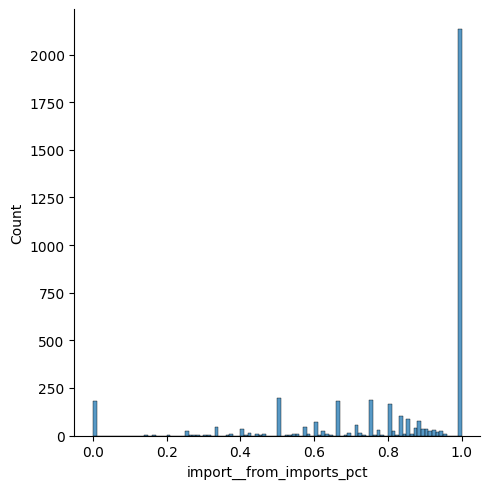

In [36]:
sns.displot(X['import__from_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [37]:
print_outliers_for_df_column(X, 'import__from_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.3096010684967041
Rango valores atípicos extremos (Tukey): [0.0,1.75]
Rango valores atípicos leves (Tukey): [0.375,1.375]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.5437888686420764,1.126890217847873]
-3.0IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a 0.0 (Q1-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 271 instancias tienen un valor para import__from_imports_pct inferior a 0.375 (Q1-1.5*IQR) para import__from_imports_pct. Representando un 6.735% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 1.375 (Q3+1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 1.75 (Q3-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un va

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [38]:
X[(X['import__from_imports_pct'] > 0.0) & (X['import__from_imports_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,1711.000000,1711.000000,1711.0,1711.000000,1711.000000,1711.000000,1711.000000
mean,7.583869,0.300726,1.0,0.699275,1.751578,0.014775,0.623023
std,4.391893,0.172831,0.0,0.172831,0.755982,0.076383,0.477344
min,2.000000,0.043478,1.0,0.142857,1.000000,0.000000,0.000000
25%,5.000000,0.166667,1.0,0.585784,1.200000,0.000000,0.000000
50%,7.000000,0.250000,1.0,0.750000,1.600000,0.000000,1.000000
75%,10.000000,0.414216,1.0,0.833333,2.000000,0.000000,1.000000
max,62.000000,0.857143,1.0,0.956522,7.000000,1.000000,1.000000


### Variable local_imports_pct (7/7)
Esta variable representa la proporción de imports no escritos al comienzo del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.68. 

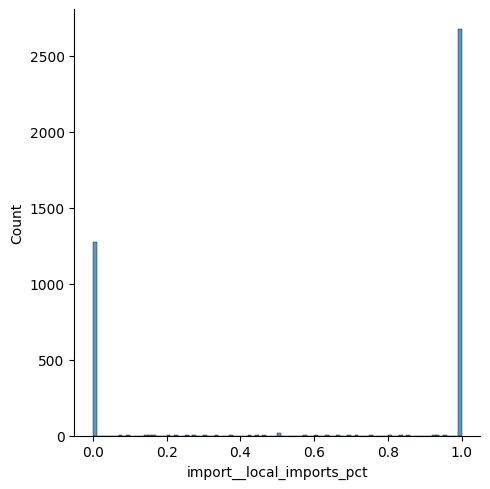

In [39]:
sns.displot(X['import__local_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [40]:
print_outliers_for_df_column(X, 'import__local_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.3930028608807168
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-7.224489337942685,1.3790660157714951]
-3.0IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -3.0 (Q1-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -1.5 (Q1-1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 2.5 (Q3+1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 4.0 (Q3-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valo

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [41]:
X[(X['import__local_imports_pct'] < 1.0) & X['import__local_imports_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,7.772152,0.262493,0.822785,0.737507,1.760460,0.006235,0.528384
std,4.883120,0.223885,0.384291,0.223885,0.723682,0.023321,0.236256
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
25%,5.000000,0.142857,1.000000,0.666667,1.333333,0.000000,0.375000
50%,6.000000,0.200000,1.000000,0.800000,1.500000,0.000000,0.500000
75%,9.000000,0.333333,1.000000,0.857143,2.000000,0.000000,0.703297
max,29.000000,1.000000,1.000000,1.000000,4.333333,0.142857,0.958333


### IMPORTANTE
El 31% tienen un 0% y el 66% tienen un 100%.

## Multivariate

Isolation forest algorithm

In [42]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level
186,4,1.000000,1.0,0.000000,0.0,0.0,0.500000,PROFESSIONAL
208,2,1.000000,1.0,0.000000,0.0,0.0,0.000000,PROFESSIONAL
389,1,1.000000,1.0,0.000000,0.0,0.0,0.000000,PROFESSIONAL
2156,7,0.857143,1.0,0.142857,4.0,0.0,0.142857,PROFESSIONAL
3972,2,1.000000,1.0,0.000000,0.0,0.0,0.000000,PROFESSIONAL


### IMPORTANTE
Revisar las 13 identificadas como outliers.

In [43]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,4019.0,5.040308,4.432433,0.0,2.00,4.000000,7.000000,62.0
import__module_imports_pct,4019.0,0.136523,0.202751,0.0,0.00,0.000000,0.250000,1.0
import__average_imported_modules,4019.0,0.434188,0.495711,0.0,0.00,0.000000,1.000000,1.0
import__from_imports_pct,4019.0,0.828394,0.255709,0.0,0.75,1.000000,1.000000,1.0
import__average_from_imported_modules,4019.0,1.497570,0.832736,0.0,1.00,1.285714,1.833333,16.0
import__average_as_in_imported_modules,4019.0,0.007306,0.056264,0.0,0.00,0.000000,0.000000,1.0
import__local_imports_pct,4019.0,0.675566,0.464228,0.0,0.00,1.000000,1.000000,1.0


In [44]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
import__number_imports,5.0,3.200000,2.387467,1.000000,2.0,2.0,4.000000,7.000000
import__module_imports_pct,5.0,0.971429,0.063888,0.857143,1.0,1.0,1.000000,1.000000
import__average_imported_modules,5.0,1.000000,0.000000,1.000000,1.0,1.0,1.000000,1.000000
import__from_imports_pct,5.0,0.028571,0.063888,0.000000,0.0,0.0,0.000000,0.142857
import__average_from_imported_modules,5.0,0.800000,1.788854,0.000000,0.0,0.0,0.000000,4.000000
import__average_as_in_imported_modules,5.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
import__local_imports_pct,5.0,0.128571,0.216654,0.000000,0.0,0.0,0.142857,0.500000
